In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import fastai
from fastai import *
from fastai.vision import *
from upassai import *
fastai.__version__

'1.0.39'

In [3]:
vggface2_path = '../data/vggface2'

## prepare valid dataset

In [4]:
valid_df = pd.read_csv('dataset/valid_result.csv')
# 20750
valid_df = valid_df.loc[1:6400]

In [5]:
len(valid_df)

6400

In [6]:
valid_source = create_bunch(valid_df, cols='source',
                            path=vggface2_path+'/valid/')
valid_target = create_bunch(valid_df, cols='target',
                            path=vggface2_path+'/valid/')
# valid_source.transform(get_transforms())

In [7]:
valid_ds = TwinDataset(valid_source.train_ds, valid_target.train_ds)

## prepare train dataset

In [8]:
train_df = pd.read_csv('dataset/train_result.csv')
#392050
train_df = train_df.loc[1:384000]

In [9]:
len(train_df)

384000

In [10]:
train_source = create_bunch(train_df, cols='source',
                            path=vggface2_path+'/train/')
train_target = create_bunch(train_df, cols='target',
                            path=vggface2_path+'/train/')

In [11]:
train_ds = TwinDataset(train_source.train_ds, train_target.train_ds)

## final databunch

In [12]:
twin_databunch = DataBunch.create(
    train_ds=train_ds, valid_ds=valid_ds, path=vggface2_path, bs=16)

## training

In [13]:
from fastai.callbacks.tracker import *

In [14]:
learner = Learner(twin_databunch,
                  SiameseNetwork(
                      architecture=fastai.vision.models.resnet152,
                      nf=4096, nc=2,
                      lin_ftrs=[800, 500, 300, 100, 50, 20]),
                  loss_func=contrastive_loss,
                  path='./models'
                  )

learner.callbacks.append(TerminateOnNaNCallback())
learner.callbacks.append(SaveModelCallback(learner))
learner.callbacks.append(EarlyStoppingCallback(learner, patience=3))

learner

Learner(data=DataBunch;

Train: <upassai.data.TwinDataset object at 0x7f3cc0d3b080>;

Valid: <upassai.data.TwinDataset object at 0x7f3cc515ea58>;

Test: None, model=SiameseNetwork(
  (body): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(

In [15]:
# learner = to_fp16(learner)

In [16]:
learner.fit_one_cycle(5)

epoch,train_loss,valid_loss
1,1.163439,3.470876
2,0.965425,3469757.500000
3,0.877890,466.465454
4,0.775811,0.733433
5,0.769043,0.677600


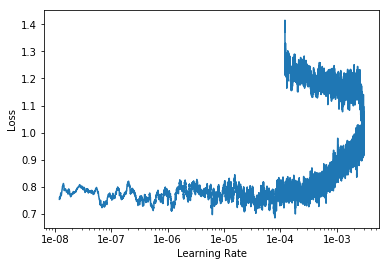

In [17]:
learner.recorder.plot()

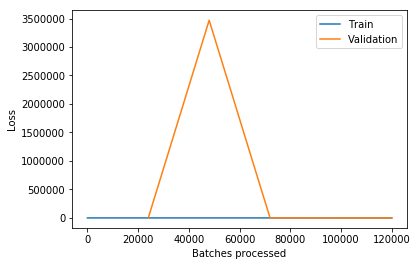

In [18]:
learner.recorder.plot_losses()

In [19]:
learner.save('final_model')

In [20]:
learner.fit_one_cycle(5)

epoch,train_loss,valid_loss
1,0.873155,0.771686
2,0.859785,14.010229
3,0.808837,147.790054
4,0.751300,0.659794
5,0.688536,0.622440


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
learner.save('final_model_after_10e')

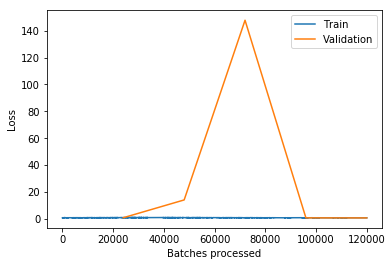

In [22]:
learner.recorder.plot_losses()

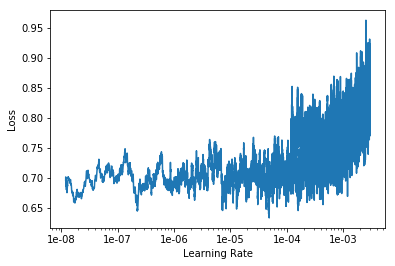

In [23]:
learner.recorder.plot()